# 7

In [129]:
from math import *
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from random import randint

In [130]:
u0 = lambda x: x**2 + cos(x)
ul = lambda t: (1 + t)**2 + cos(1)

du0 = lambda x: 2*x - sin(x)
d2u0 = lambda x: 2 - cos(x)
d3u0 = lambda x: sin(x)

dul = lambda t: 2*(1 + t)
d2ul = lambda t: 2
d3ul = lambda t: 0
a = lambda x: -1
b = lambda x: sin(x)
dadx = lambda x: 0
dadt = 0

u_an = lambda x, t: (x + t)**2 + cos(x)
print(u_an(0.8, 1))
t0, t1 = 0, 1
x0, x1 = 0, 1
#N = 1000   # по времени
L = 161  # по пространству
CFL = 1.5  # -0.25

xx = np.linspace(x0, x1, L + 1)
h = np.diff(xx)[0]
tau = CFL * h
N = int((t1 - t0) / tau)
tt = np.linspace(t0, t1, N+1)
tau = np.diff(tt)[0]

u = np.zeros([N+1, L + 1])
# u[:, 0] = [ul(t) for t in tt]
u[0, :] = [u0(x) for x in xx]

3.9367067093471655


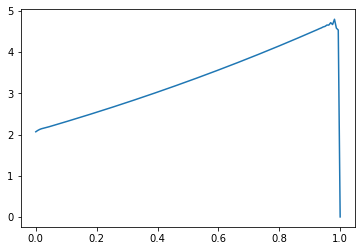

In [131]:
for n in range(N):
    for l in range(L):
        if l <= L-3:
            a1 = tau/(6*h) * (2*u[n][l+3] - 9*u[n][l+2] + 18*u[n][l+1] - 11*u[n][l])
            a2 = tau**2/(2*h**2) * (-u[n][l+3] + 4*u[n][l+2] - 5*u[n][l+1] + 2*u[n][l]) + tau*sin(h*l) + 1/2*tau**2*cos(h*l)
            a3 = tau**3/(6*h**3) * (u[n][l+3] - 3*u[n][l+2] + 3*u[n][l+1] - u[n][l]) - tau**3/6*sin(h*l)
            u[n+1][l] = u[n][l] + a1 + a2 + a3
        elif l == L - 1:
            u[n+1][l] = ul(tt[n+1])
        elif l == L - 3:   
            t = tt[n+1]
            u0l =  (dul(t) + t) + 1/b(h*l) * (du0(h*l) + h*l)
            u0ll = (d2ul(t) - 1) + 1/(b(h*l)**2) * (d2u0(h*l) - 1)
            u0lll= (d3ul(t) + 1)/(b(h*l)**3) * (d3u0(h*l))
            u[n+1][l] = ul(t) + u0l*2*h + u0ll*2*h*h + u0lll*4/3*h**3
        elif l == L - 2:
            t = tt[n+1]
            u0l = (dul(t) + t) + 1/b(h*l) * (du0(h*l) + h*l)
            u0ll = (d2ul(t) - 1) + 1/(b(h*l)**2) * (d2u0(h*l) - 1)
            u0lll=  (d3ul(t) + 1)/(b(h*l)**3) * (d3u0(h*l))
            u[n+1][l] = ul(t) + u0l*h + u0ll*h*h/2 + u0lll*h**3 / 6

plt.plot(xx, u[-1])

In [132]:

n = L//10
u_ann = [u_an(x, tt[-1]) for x in xx[::n]]
diff = abs(u[-1][::n] - u_ann)

df = pd.DataFrame({'x': xx[::n], 'u': u[-1][::n], 'u*': u_ann, 'd': diff})
df

,x,u,u*,d
0,0.000000,2.068679,2.000000,0.068679
1,0.099379,2.313743,2.203700,0.110044
2,0.198758,2.540435,2.417333,0.123102
3,0.298137,2.778026,2.641044,0.136982
4,0.397516,3.026760,2.875075,0.151685
5,0.496894,3.286971,3.119760,0.167211
6,0.596273,3.559082,3.375523,0.183559
7,0.695652,3.843603,3.642872,0.200731
8,0.795031,4.141125,3.922399,0.218726
9,0.894410,4.452343,4.214768,0.237575


In [133]:
u_an(0.5, 1)

3.1275825618903728

In [134]:
max(diff)

0.2375751901652441